In [1]:
!pip install qiskit qiskit_aer

In [2]:
# Grover's Search Algorithm using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

In [4]:
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

In [5]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "101"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


Student Practice Tasks

Task 1: Change the marked state
Try different marked states such as 001, 111, or 010 and observe the output histogram.

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate

def make_oracle(n, marked):
    qc = QuantumCircuit(n)
    marked_bits = list(marked[::-1])
    for i, b in enumerate(marked_bits):
        if b == '0':
            qc.x(i)
    if n == 1:
        qc.z(0)
    else:
        mcx = MCXGate(num_ctrl_qubits=n-1)
        qc.append(mcx, list(range(n)))
    for i, b in enumerate(marked_bits):
        if b == '0':
            qc.x(i)
    qc.name = "Oracle"
    return qc

def make_diffuser(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    if n == 1:
        qc.z(0)
    else:
        mcx = MCXGate(num_ctrl_qubits=n-1)
        qc.append(mcx, list(range(n)))
    qc.x(range(n))
    qc.h(range(n))
    qc.name = "Diffuser"
    return qc

def grover_circuit(n, marked, iterations=1):
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle = make_oracle(n, marked)
    diffuser = make_diffuser(n)
    for _ in range(iterations):
        qc.compose(oracle, inplace=True)
        qc.compose(diffuser, inplace=True)
    qc.measure(range(n), range(n))
    return qc

def run_grover(n, marked, iterations=1, shots=2048):
    qc = grover_circuit(n, marked, iterations)
    sim = AerSimulator()
    t_qc = transpile(qc, sim)
    result = sim.run(t_qc, shots=shots).result()
    counts = result.get_counts()
    return counts

marked_states = ['001', '111', '010']
results = {state: run_grover(3, state) for state in marked_states}

import matplotlib.pyplot as plt

for state, counts in results.items():
    plot_histogram(counts, title=f"Grover Search Result for marked state {state}")
    plt.show()


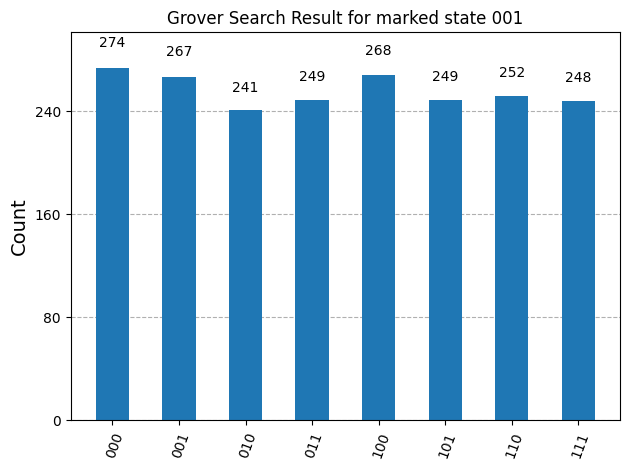

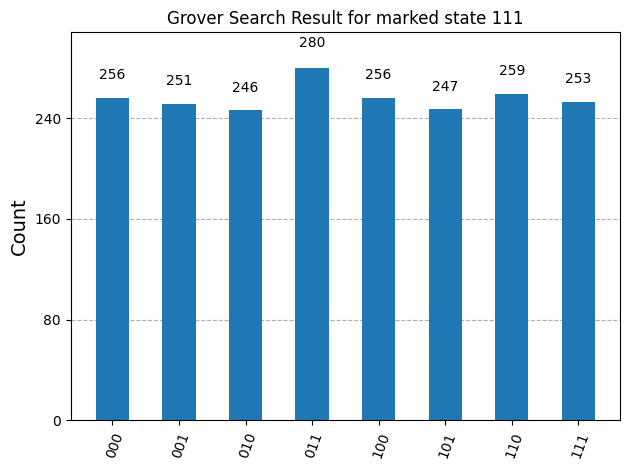

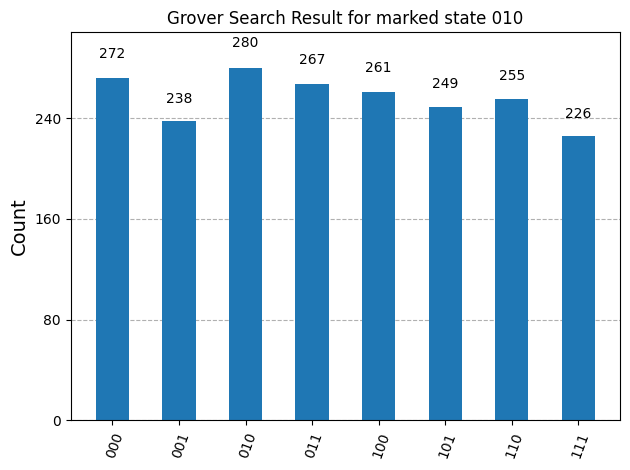

In [13]:
import matplotlib.pyplot as plt
from IPython.display import display

for state, counts in results.items():
    fig = plot_histogram(counts, title=f"Grover Search Result for marked state {state}")
    display(fig)



Task 2: Modify the number of qubits
Extend the algorithm to 4 qubits and update the oracle and diffuser accordingly.

     ┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌─┐         
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤M├─────────
     ├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└╥┘┌─┐      
q_1: ┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├─╫─┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐  │  ├───┤├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫──╫─┤M├───
     ├───┤└───┘┌─┴─┐├───┤├───┤└───┘┌─┴─┐├───┤├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤ X ├┤ H ├┤ X ├─────┤ X ├┤ X ├┤ H ├─╫──╫──╫─┤M├
     └───┘     └───┘└───┘└───┘     └───┘└───┘└───┘ ║  ║  ║ └╥┘
c: 4/══════════════════════════════════════════════╩══╩══╩══╩═
                                                   0  1  2  3 


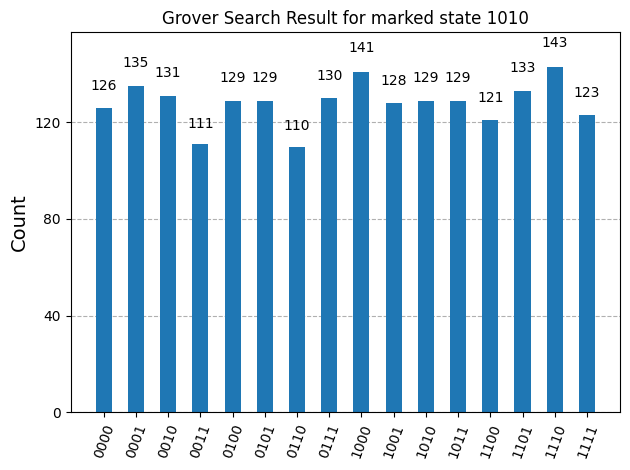

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
import matplotlib.pyplot as plt
from IPython.display import display

def make_oracle(n, marked):
    qc = QuantumCircuit(n)
    marked_bits = list(marked[::-1])
    for i, b in enumerate(marked_bits):
        if b == '0':
            qc.x(i)
    if n == 1:
        qc.z(0)
    else:
        mcx = MCXGate(num_ctrl_qubits=n-1)
        qc.append(mcx, list(range(n)))
    for i, b in enumerate(marked_bits):
        if b == '0':
            qc.x(i)
    qc.name = "Oracle"
    return qc

def make_diffuser(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    if n == 1:
        qc.z(0)
    else:
        mcx = MCXGate(num_ctrl_qubits=n-1)
        qc.append(mcx, list(range(n)))
    qc.x(range(n))
    qc.h(range(n))
    qc.name = "Diffuser"
    return qc

def grover_circuit(n, marked, iterations=1):
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle = make_oracle(n, marked)
    diffuser = make_diffuser(n)
    for _ in range(iterations):
        qc.compose(oracle, inplace=True)
        qc.compose(diffuser, inplace=True)
    qc.measure(range(n), range(n))
    return qc

def run_grover(n, marked, iterations=1, shots=2048):
    qc = grover_circuit(n, marked, iterations)
    sim = AerSimulator()
    t_qc = transpile(qc, sim)
    result = sim.run(t_qc, shots=shots).result()
    counts = result.get_counts()
    return qc, counts

# --- Run Grover for 4 qubits ---
n = 4
marked_state = '1010'   # you can change this to any 4-bit pattern, e.g., '0111'
iterations = 1

qc, counts = run_grover(n, marked_state, iterations)

print(qc.draw('text'))

display(plot_histogram(counts, title=f"Grover Search Result for marked state {marked_state}"))


Task 3: Add multiple iterations
Run the oracle and diffuser steps multiple times to increase the probability of finding the marked state.

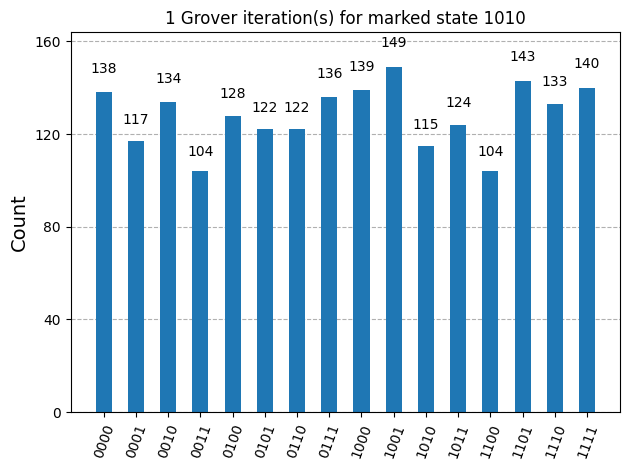

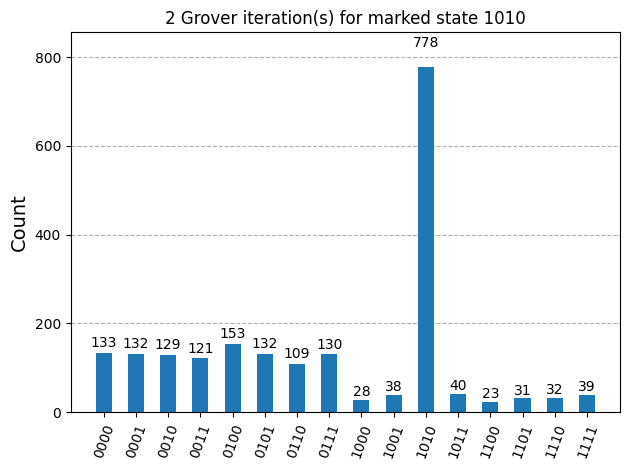

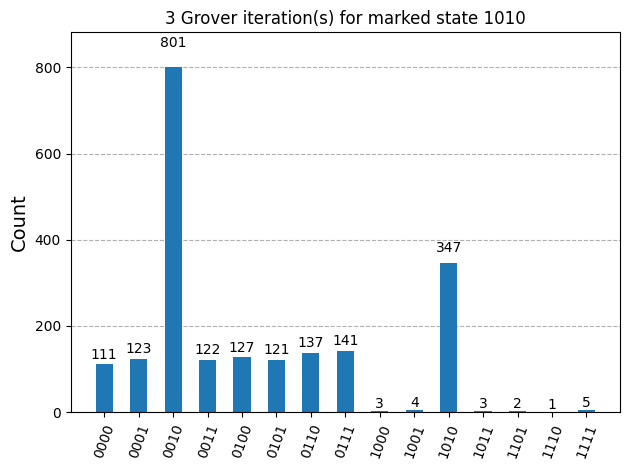

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
import matplotlib.pyplot as plt
from IPython.display import display

def make_oracle(n, marked):
    qc = QuantumCircuit(n)
    marked_bits = list(marked[::-1])
    for i, b in enumerate(marked_bits):
        if b == '0':
            qc.x(i)
    if n == 1:
        qc.z(0)
    else:
        mcx = MCXGate(num_ctrl_qubits=n-1)
        qc.append(mcx, list(range(n)))
    for i, b in enumerate(marked_bits):
        if b == '0':
            qc.x(i)
    qc.name = "Oracle"
    return qc

def make_diffuser(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    if n == 1:
        qc.z(0)
    else:
        mcx = MCXGate(num_ctrl_qubits=n-1)
        qc.append(mcx, list(range(n)))
    qc.x(range(n))
    qc.h(range(n))
    qc.name = "Diffuser"
    return qc

def grover_circuit(n, marked, iterations=1):
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle = make_oracle(n, marked)
    diffuser = make_diffuser(n)
    for _ in range(iterations):
        qc.compose(oracle, inplace=True)
        qc.compose(diffuser, inplace=True)
    qc.measure(range(n), range(n))
    return qc

def run_grover(n, marked, iterations=1, shots=2048):
    qc = grover_circuit(n, marked, iterations)
    sim = AerSimulator()
    t_qc = transpile(qc, sim)
    result = sim.run(t_qc, shots=shots).result()
    counts = result.get_counts()
    return qc, counts

# --- Experiment parameters ---
n = 4
marked_state = '1010'
iteration_list = [1, 2, 3]  # Try 1, 2, 3 Grover iterations

results = {}
for iters in iteration_list:
    qc, counts = run_grover(n, marked_state, iters)
    results[iters] = counts

# --- Plot all results ---
for iters, counts in results.items():
    fig = plot_histogram(counts, title=f"{iters} Grover iteration(s) for marked state {marked_state}")
    display(fig)



Task 4:Circuit Visualization
Use qc.draw('mpl') to visualize the circuit structure in the notebook.

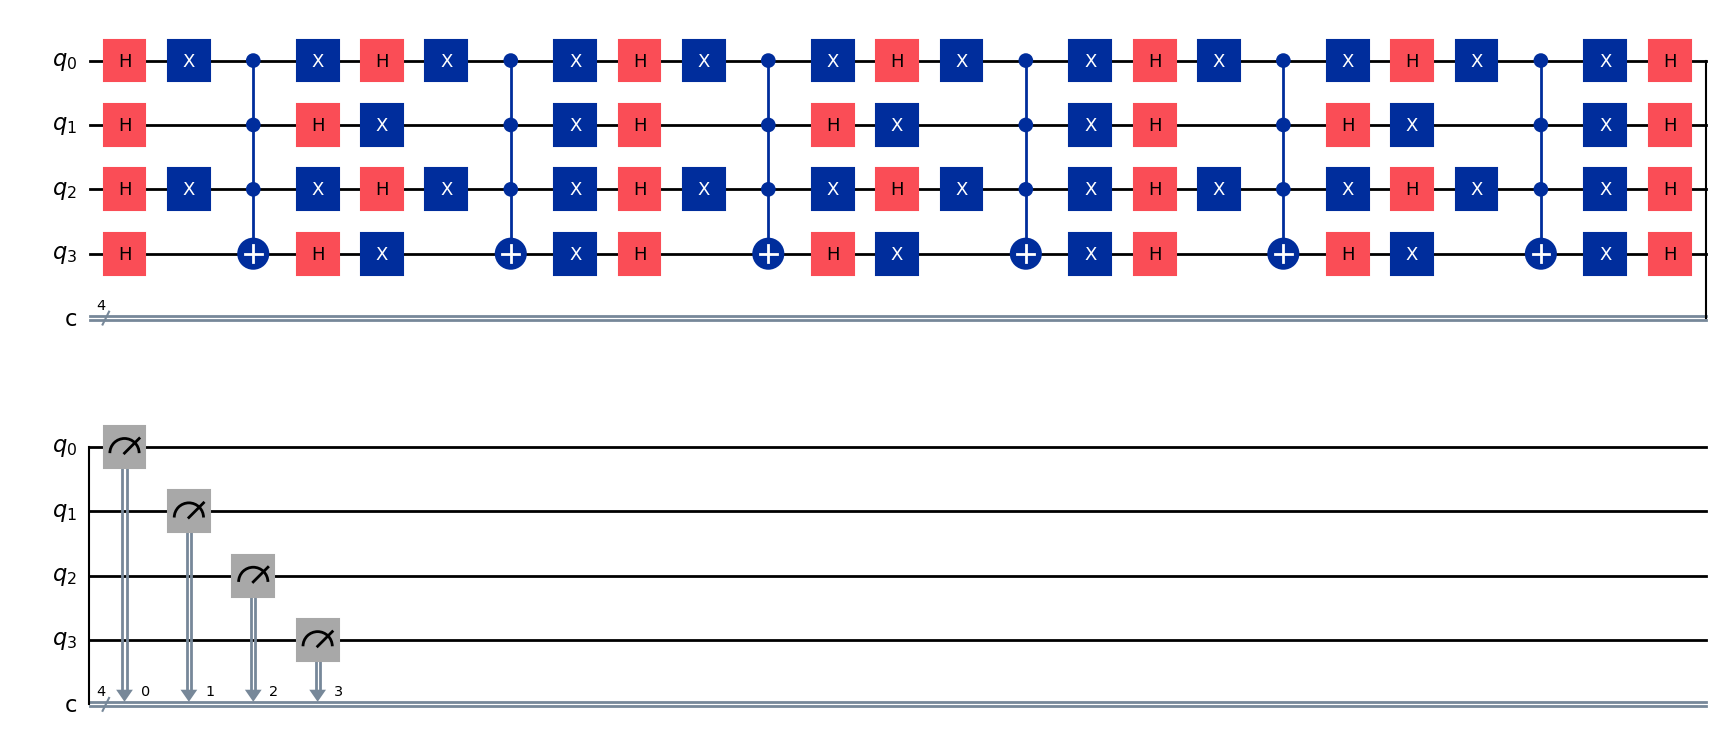

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
from IPython.display import display

def make_oracle(n, marked):
    qc = QuantumCircuit(n)
    marked_bits = list(marked[::-1])
    for i, b in enumerate(marked_bits):
        if b == '0':
            qc.x(i)
    if n == 1:
        qc.z(0)
    else:
        mcx = MCXGate(num_ctrl_qubits=n-1)
        qc.append(mcx, list(range(n)))
    for i, b in enumerate(marked_bits):
        if b == '0':
            qc.x(i)
    qc.name = "Oracle"
    return qc

def make_diffuser(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    if n == 1:
        qc.z(0)
    else:
        mcx = MCXGate(num_ctrl_qubits=n-1)
        qc.append(mcx, list(range(n)))
    qc.x(range(n))
    qc.h(range(n))
    qc.name = "Diffuser"
    return qc

def grover_circuit(n, marked, iterations=1):
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle = make_oracle(n, marked)
    diffuser = make_diffuser(n)
    for _ in range(iterations):
        qc.compose(oracle, inplace=True)
        qc.compose(diffuser, inplace=True)
    qc.measure(range(n), range(n))
    return qc

# --- Visualize 4-qubit Grover circuit ---
n = 4
marked_state = '1010'
iterations = 3  # visualize after 3 Grover iterations

qc = grover_circuit(n, marked_state, iterations)
display(qc.draw('mpl'))


Task 5: Experiment with Noise
Add a noise model using Qiskit Aer’s NoiseModel and compare results with the ideal simulator.

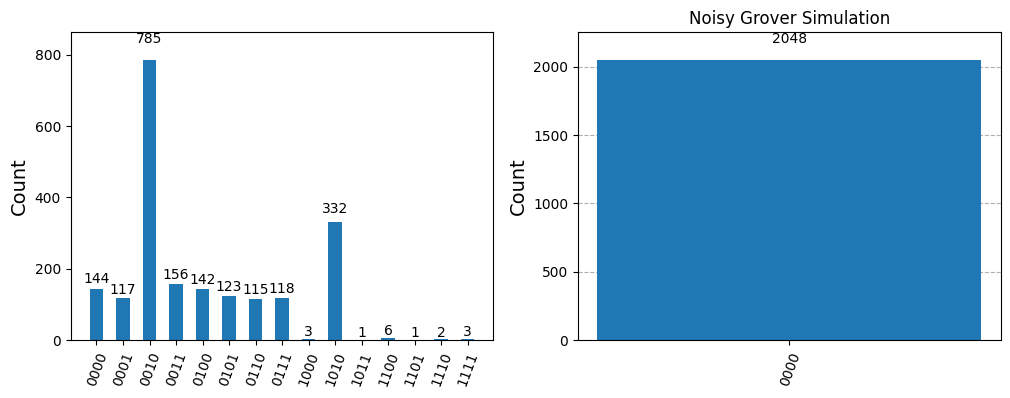

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate
from qiskit_aer.noise import NoiseModel, depolarizing_error, thermal_relaxation_error

import matplotlib.pyplot as plt
from IPython.display import display

def make_oracle(n, marked):
    qc = QuantumCircuit(n)
    marked_bits = list(marked[::-1])
    for i, b in enumerate(marked_bits):
        if b == '0':
            qc.x(i)
    if n == 1:
        qc.z(0)
    else:
        mcx = MCXGate(num_ctrl_qubits=n-1)
        qc.append(mcx, list(range(n)))
    for i, b in enumerate(marked_bits):
        if b == '0':
            qc.x(i)
    return qc

def make_diffuser(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    if n == 1:
        qc.z(0)
    else:
        mcx = MCXGate(num_ctrl_qubits=n-1)
        qc.append(mcx, list(range(n)))
    qc.x(range(n))
    qc.h(range(n))
    return qc

def grover_circuit(n, marked, iterations=1):
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle = make_oracle(n, marked)
    diffuser = make_diffuser(n)
    for _ in range(iterations):
        qc.compose(oracle, inplace=True)
        qc.compose(diffuser, inplace=True)
    qc.measure(range(n), range(n))
    return qc

def make_noise_model():
    noise = NoiseModel()
    dep1 = depolarizing_error(0.002, 1)
    dep2 = depolarizing_error(0.01, 2)
    relax1 = thermal_relaxation_error(50e-6, 70e-6, 0.001)
    relax2 = thermal_relaxation_error(100e-6, 140e-6, 0.002)
    noise.add_all_qubit_quantum_error(dep1.compose(relax1), ['h', 'x', 'u3', 'u2'])
    noise.add_all_qubit_quantum_error(dep2.compose(relax2), ['cx'])

    return noise

def run_grover_with_noise(n, marked, iterations=1, shots=2048):
    qc = grover_circuit(n, marked, iterations)
    ideal_sim = AerSimulator()
    noisy_sim = AerSimulator(noise_model=make_noise_model())

    t_qc_ideal = transpile(qc, ideal_sim)
    t_qc_noisy = transpile(qc, noisy_sim)

    ideal_counts = ideal_sim.run(t_qc_ideal, shots=shots).result().get_counts()
    noisy_counts = noisy_sim.run(t_qc_noisy, shots=shots).result().get_counts()

    return ideal_counts, noisy_counts

# --- Run the experiment ---
n = 4
marked_state = '1010'
iterations = 3

ideal_counts, noisy_counts = run_grover_with_noise(n, marked_state, iterations)

# --- Visualize ---
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_histogram(ideal_counts, title="Ideal Grover Simulation", ax=axs[0])
plot_histogram(noisy_counts, title="Noisy Grover Simulation", ax=axs[1])
plt.show()


Task 5: Real Hardware Execution (Optional)
If you have IBM Quantum credentials, try running the same circuit on a real IBMQ backend and compare the histogram results.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token="hidden for security reasons",
    instance="hidden for security reasons",
    overwrite=True
)


service = QiskitRuntimeService(channel="ibm_cloud")
print("Backends available:")
for backend in service.backends():
    print("-", backend.name)


Backends available:
- ibm_fez
- ibm_torino
- ibm_marrakesh


In [4]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import MCXGate

def make_oracle(n, marked):
    qc = QuantumCircuit(n)
    marked_bits = list(marked[::-1])
    for i, b in enumerate(marked_bits):
        if b == '0':
            qc.x(i)
    if n == 1:
        qc.z(0)
    else:
        mcx = MCXGate(num_ctrl_qubits=n-1)
        qc.append(mcx, list(range(n)))
    for i, b in enumerate(marked_bits):
        if b == '0':
            qc.x(i)
    qc.name = "Oracle"
    return qc

def make_diffuser(n):
    qc = QuantumCircuit(n)
    qc.h(range(n))
    qc.x(range(n))
    if n == 1:
        qc.z(0)
    else:
        mcx = MCXGate(num_ctrl_qubits=n-1)
        qc.append(mcx, list(range(n)))
    qc.x(range(n))
    qc.h(range(n))
    qc.name = "Diffuser"
    return qc

def grover_circuit(n, marked, iterations=1):
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle = make_oracle(n, marked)
    diffuser = make_diffuser(n)
    for _ in range(iterations):
        qc.compose(oracle, inplace=True)
        qc.compose(diffuser, inplace=True)
    qc.measure(range(n), range(n))
    return qc


Running on: ibm_fez
Job ID: d46v5neqsa9s73cb4aog


c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\counts_visualization.py:391: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_ylim, min([1.1 * sum(all_vals), max(1.1 * val for val in all_vals)])])


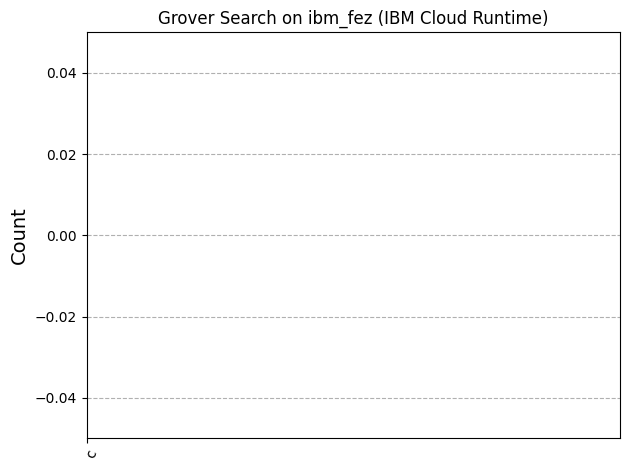


Success probability for marked state '101': 0.00%


In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit import transpile
from qiskit.visualization import plot_histogram
from IPython.display import display

service = QiskitRuntimeService(channel="ibm_cloud")

# Pick the least-busy backend automatically
backend = service.least_busy(simulator=False, min_num_qubits=3)
print("Running on:", backend.name)

n = 3
marked_state = '101'
iterations = 1

# --- Build Grover circuit ---
qc = grover_circuit(n, marked_state, iterations)
t_qc = transpile(qc, backend, optimization_level=3)

# --- Execute on real hardware via Runtime Sampler ---
sampler = SamplerV2(backend)
job = sampler.run([t_qc], shots=2048)
print("Job ID:", job.job_id())

# --- Retrieve results ---
result = job.result()
data_bin = result[0].data

# --- Extract measurement data (varies by backend version) ---
if "meas" in data_bin:
    meas_data = data_bin["meas"]
    if hasattr(meas_data, "get_counts"):
        raw_counts = meas_data.get_counts()
    elif hasattr(meas_data, "counts"):
        raw_counts = meas_data.counts
    elif isinstance(meas_data, dict):
        raw_counts = meas_data
    else:
        raw_counts = dict(meas_data)
else:
    raw_counts = dict(data_bin)

# --- Convert both keys and values to standard Python types ---
counts = {}
for k, v in raw_counts.items():
    # Convert key → binary string
    if hasattr(k, "to01"):
        key_str = k.to01()
    elif isinstance(k, bytes):
        key_str = k.decode()
    else:
        key_str = str(k)
    # Convert value → float
    if hasattr(v, "item"):
        val = float(v.item())
    elif isinstance(v, (int, float)):
        val = v
    else:
        try:
            val = float(v)
        except Exception:
            val = 0
    counts[key_str] = val

# --- Plot histogram safely ---
display(plot_histogram(counts, title=f"Grover Search on {backend.name} (IBM Cloud Runtime)"))

# --- Compute success probability ---
total = sum(counts.values())
success_prob = counts.get(marked_state, 0) / total if total > 0 else 0
print(f"\nSuccess probability for marked state '{marked_state}': {success_prob:.2%}")


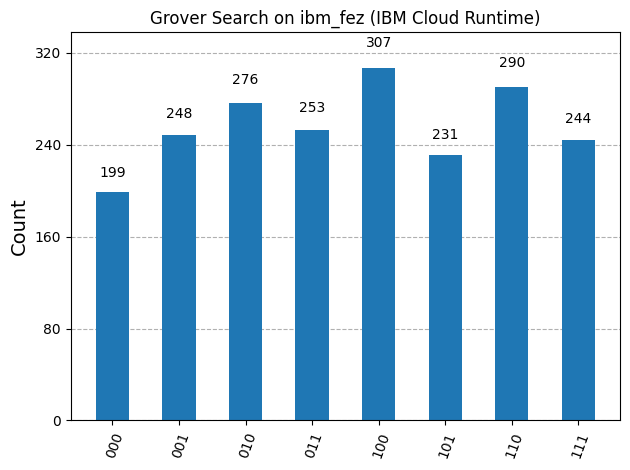


Success probability for marked state '101': 11.28%


In [17]:
import numpy as np
from collections import Counter
from qiskit.visualization import plot_histogram
from IPython.display import display

bit_array = result[0].data.c  # BitArray containing raw bits
num_bits = bit_array.num_bits
num_shots = bit_array.num_shots

# Convert BitArray → 2D numpy array of bits (num_shots × num_bits)
arr = np.unpackbits(np.asarray(bit_array._array, dtype=np.uint8))
arr = arr.reshape(num_shots, -1)[:, -num_bits:]  # keep only last num_bits columns

# Turn each shot into a string like '101'
bitstrings = [''.join(map(str, row)) for row in arr]

# Count occurrences
counts = dict(Counter(bitstrings))

# Plot histogram
display(plot_histogram(counts, title=f"Grover Search on {backend.name} (IBM Cloud Runtime)"))

# Compute success probability
total = sum(counts.values())
success_prob = counts.get(marked_state, 0) / total if total > 0 else 0
print(f"\nSuccess probability for marked state '{marked_state}': {success_prob:.2%}")
